In [24]:
from sklearn import datasets

In [25]:
iris = datasets.load_iris()
samples = iris.data
print(samples)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

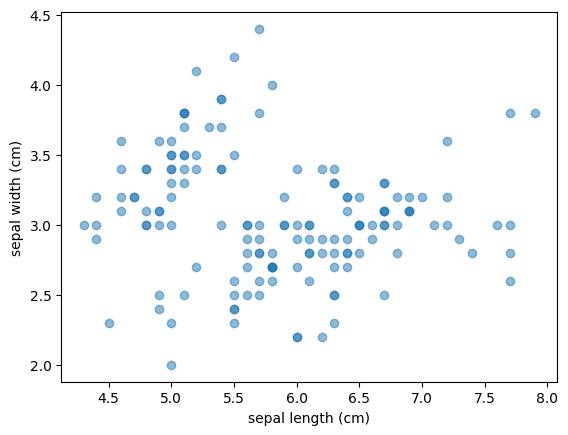

In [26]:
from matplotlib import pyplot as plt

x = samples[:, 0]
y = samples[:, 1]

plt.scatter(x, y, alpha = 0.5)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

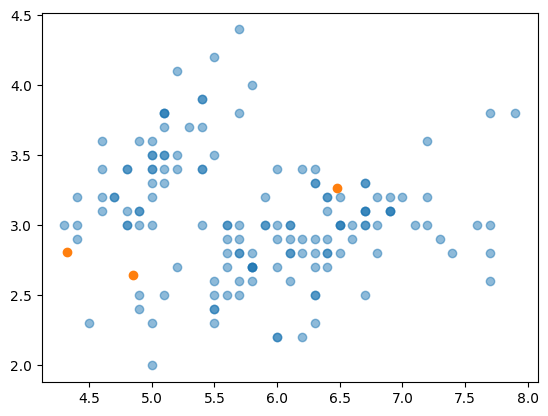

In [27]:
import numpy as np

k = 3

centroids_x = np.random.uniform(min(x), max(x), k)
centroids_y = np.random.uniform(min(y), max(y), k)
centroids = list(zip(centroids_x, centroids_y))

plt.scatter(x, y, alpha = 0.5)
plt.scatter(centroids_x, centroids_y)
plt.show

In [28]:
# step 2 : assign datas to nearest centroid
# centroids에 가까운 데이터들을 할당
# 가깝다라는 것을 정량적으로 계산하기 위해 각 데이터를 벡터로 간주하여 유클리드 거리를 계산함

# 두 데이터 포인트 사이의 거리를 계산하는 함수
def distance(a, b):
    return sum([(el_a - el_b) ** 2 for el_a, el_b in list(zip(a, b))]) ** 0.5

In [29]:
# 각 데이터들 별로 3개의 centroids와의 거리를 측정함
# labels란 배열을 생성하고, 가장 가까운 centroids의 index를 저장하는 것임

# 각 데이터 포인트를 그룹화할 labels를 생성함 (0, 1, 2)
labels = np.zeros(len(samples))
sepal_length_width = np.array(list(zip(x, y)))

# 각 데이터를 순회하면서 centroids와의 거리를 측정함
for i in range(len(samples)):
    distances = np.zeros(k) # 초기 거리는 모두 0으로 초기화, 3개 요소 1차원 배열 (k = 3)
    for j in range(k): # 3번 반복 (각각의 x, y에 대해 세 중심과의 거리를 구해 distance[0][1][2]에 집어 넣음)
        distances[j] = distance(sepal_length_width[i], centroids[j])
    cluster = np.argmin(distances) # np.argmin은 가장 작은 값의 index를 반환함 (세 중심 중 어디에 가까운지)
    labels[i] = cluster # labels에는 각각 x, y에 대해 세 중심 중 어디에 속하는지에 관한 정보가 있음

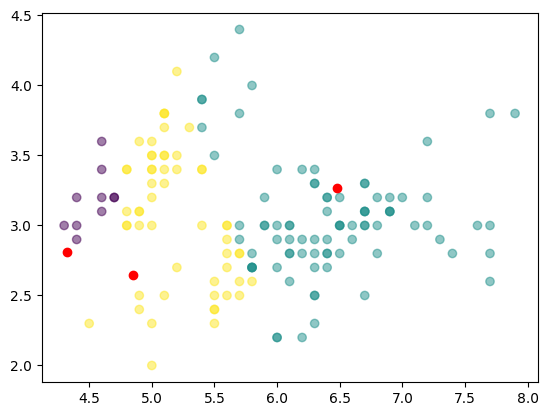

In [30]:
# 생성된 labels에는 0, 1, 2가 저장되어 각 데이터가 어느 centroid 그룹에 속해있는지를 나타냄
# 이를 시각화해서 나타내면 아래와 같음

plt.scatter(x, y, c = labels, alpha = 0.5)
plt.scatter(centroids_x, centroids_y, c = 'red')
plt.show()

# 데이터들이 가까운 centroid에 잘 할당되어 있지만, 처음 centroid를 선택할 때 랜덤으로 선택했으므로 최적화가 필요함

In [31]:
# step 3 : update centroids
# centroids를 새롭게 지정함으로써 데이터를 더 잘 그룹화 할 수 있도록 만들어야 함
# 이를 위해 기존에 지정한 centroids를 복사해두어 centroids_old에 저장함

from copy import deepcopy

centroids_old = deepcopy(centroids)

In [32]:
# 각 그룹별로 데이터의 평균을 계산함
# 즉, 각 데이터들의 평균 x 좌표와 평균 y 좌표를 계산하여 하나의 좌표를 계산함
# 이렇게 계산된 좌표는 새로운 centroid로 지정됨

for i in range(k):
    # 각 그룹에 속한 데이터들만 골라 points에 저장함
    # (labels에 섞인 값을 sepal_length_width에 구분하여 저장)
    # points는 각각의 그룹의 x, y 좌표를 가진 list임
    points = [sepal_length_width[j] for j in range(len(sepal_length_width)) if labels[j] == i]
    # points의 각 feature, 즉 각 좌표의 평균 지점을 centroid로 지정함
    centroids[i] = np.mean(points, axis = 0)

print(centroids)
print(type(centroids))
print(centroids_old)
print(type(centroids_old))

[array([4.53, 3.18]), array([6.41647059, 3.04470588]), array([5.19636364, 3.05454545])]
<class 'list'>
[(4.32245103819004, 2.807507665691049), (6.481341679471528, 3.2648390789508976), (4.852178567280451, 2.6479519364724586)]
<class 'list'>


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


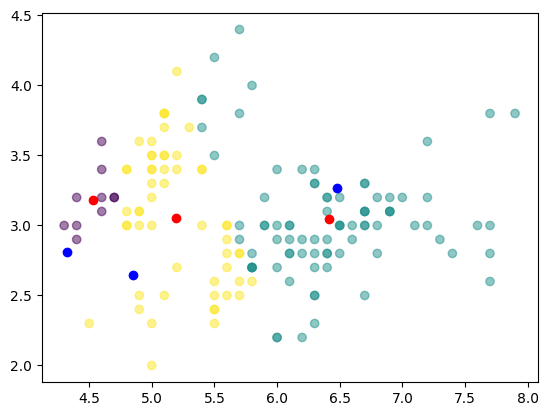

In [33]:
centroids = np.array(centroids)
centroids_old = np.array(centroids_old)
print(type(centroids))
print(type(centroids_old))

plt.scatter(x, y, c = labels, alpha = 0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c = 'red')
plt.scatter(centroids_old[:, 0], centroids_old[:, 1], c = 'blue')
plt.show()

# centroids가 전체적으로 중앙응로 이동하여 데이터의 중심 지점에 위치한 것을 확인할 수 있음

In [34]:
# step 4 : repead step 2 ~ 3 until convergence
# 필요한 모든 building blocks를 구현함
# 2 ~ 3 단계를 반복하며 최적의 centroids를 찾는 것이 목표임
# error라는 배열을 생성함
# error의 각 index는 centroids_old와 새롭게 저장된 centroids의 거리를 저장하는데,
# 이 거리거 모두 0이 되면 최적해에 수렴한 것으로 판단하여 반복을 종료함

centroids_old = np.zeros(centroids.shape) # 제일 처음의 centroids_old는 0으로 초기화 함
labels = np.zeros(len(samples))
error = np.zeros(k) # error도 초기화 해줌

for i in range(k):
    error[i] = distance(centroids_old[i], centroids[i])

In [35]:
while error.all() != 0: # 열의 데이터 중 조건과 맞는 데이터가 있으면 true, 전혀 없으면 false
    # step 2 : 가까운 centroids에 데이터를 할당함
    for i in range(len(samples)):
        distances = np.zeros(k) # 초기 거리는 모두 0으로 초기화 해줌
        for j in range(k):
            distances[j] = distance(sepal_length_width[i], centroids[j])
        cluster = np.argmin(distances) # argmin은 가장 작은 값의 index 반환
        labels[i] = cluster

    # step 3 : centroids 업데이트
    centroids_old = deepcopy(centroids)

    for i in range(k):
        # 각 그룹에 속한 데이터들만 골라 points에 저장함
        points = [sepal_length_width[j] for j in range(len(sepal_length_width)) if labels[j] == i]
        # points의 각 feature, 즉 각 좌표의 평균 지점을 centroid로 지정함
        centroids[i] = np.mean(points, axis = 0)

    # 새롭게 centroids를 업데이트 했으니 error를 다시 계산함
    for i in range(k):
        error[i] = distance(centroids_old[i], centroids[i])

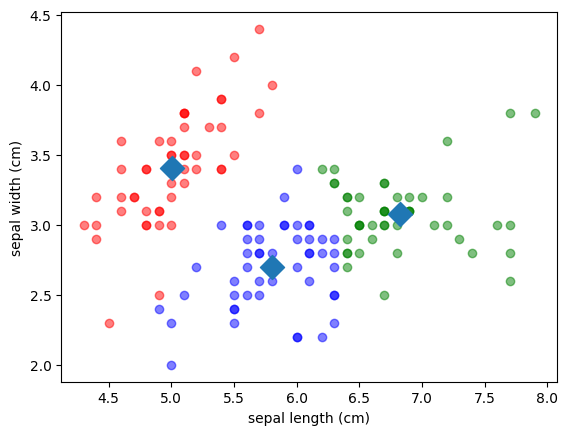

In [37]:
colors = ['r', 'g', 'b']

for i in range(k):
    points = np.array([sepal_length_width[j] for j in range(len(sepal_length_width)) if labels[j] == i])
    plt.scatter(points[:, 0], points[:, 1], c = colors[i], alpha = 0.5)

plt.scatter(centroids[:, 0], centroids[:, 1], marker = 'D', s = 150)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.show()